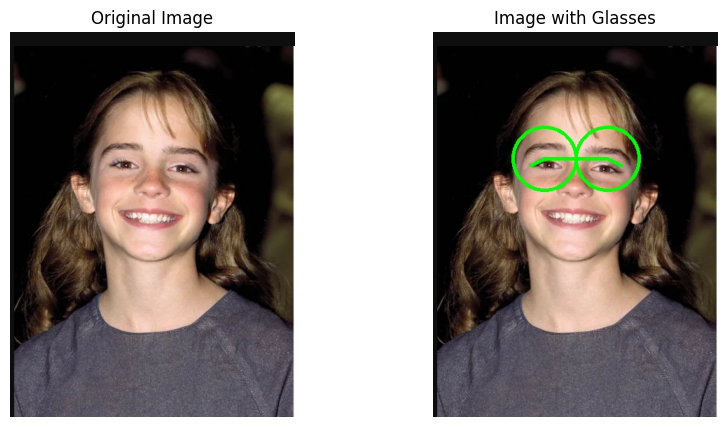

In [35]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Variant number calculation
variant_number = ord('B') % 5 + 1

# 2. Load data from lab6.xlsx
df = pd.read_excel("lab6.xlsx")

# 3. Get your variant data from the dataframe
personal_data = df.iloc[variant_number - 1]  # Adjust if indexing starts from 0

# 4. Function to add round glasses to an image
def add_glasses(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load Haar cascades for face and eyes
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        # Draw glasses
        # Center coordinates for the glasses
        center_x = x + w // 2
        center_y = y + h // 3

        # Parameters for glasses
        glasses_radius = w // 5  # Adjust as needed
        glasses_color = (0, 255, 0)  # Green
        thickness = 3  # Line thickness

        # Draw rims
        cv2.circle(image, (center_x - glasses_radius, center_y), glasses_radius, glasses_color, thickness)
        cv2.circle(image, (center_x + glasses_radius, center_y), glasses_radius, glasses_color, thickness)
        
        # Draw bridge
        cv2.line(image, (center_x - glasses_radius, center_y), (center_x + glasses_radius, center_y), glasses_color, thickness)

        # Draw temples (simple lines)
        cv2.line(image, (center_x - glasses_radius, center_y), (center_x - glasses_radius - 20, center_y + 10), glasses_color, thickness)
        cv2.line(image, (center_x + glasses_radius, center_y), (center_x + glasses_radius + 20, center_y + 10), glasses_color, thickness)

    # Save the modified image
    output_path = "output_image.jpg"
    cv2.imwrite(output_path, image)
    
    return output_path

# Test the function on Emma Watson's image
original_image_path = "emma-watson.jpg"
output_image_path = add_glasses(original_image_path)

# Display the original and output images side by side
original_img = cv2.imread(original_image_path)
output_img = cv2.imread(output_image_path)

# Convert BGR to RGB for displaying
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_img_rgb)
plt.title("Image with Glasses")
plt.axis('off')

plt.show()
